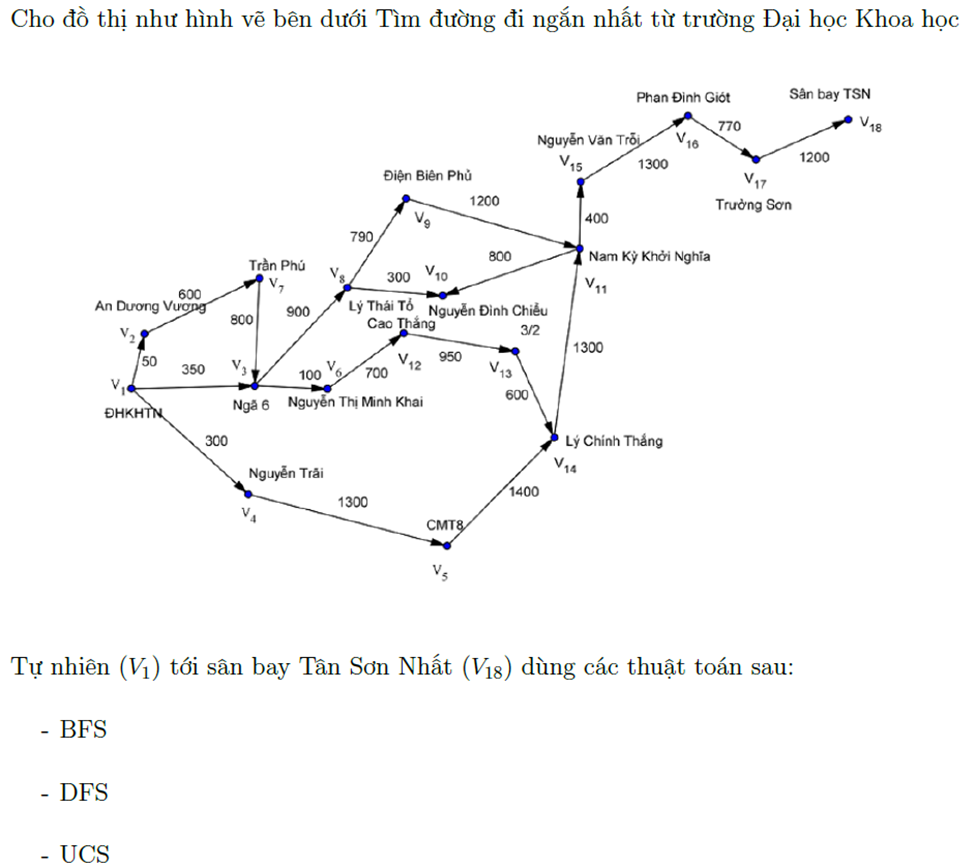

# Thuật toán BFS:
- L=[V1] , trạng thái đầu 
- Node= V1, L=[V2,V3,V4] , father[V2,V3,V4]=V1
- Node=V2 ,L=[V3,V4,V7] , father[V7] =V2
- Node=V3 ,L=[V4,V7,V6,V8], father[V6,V8] =V3 
- Node =V4, L=[V7,V6,V8,V5] , father[V5]= V4
- Node =V7 ,L =[V6,V8,V5] (V7 kề với V3 nhưng V3 đã duyệt qua rồi nên không thêm vào )
- Node =V6, L=[V8,V5,V12] , father[V12]=V6
- Node =V8, L=[V5,V12,V9,V10] , father[V9,V10]=V8
- Node =V5, L=[V12,V9,V10,V14] , father[V14]=V5
- Node =V12,L=[V9,V10,V14,V13], father[V13] =V12
- Node =V9, L=[V10,V14,V13,V11] , father[V11]=V9
- Node=V10, L=[V14,V13,V11] ,V10 kề với V11 nhưng V11 đã tồn tại trong L nên không thêm vào, father[V11]=V10
- Node =V14, L=[V13,V11] , V14 kề với V11 nhưng V11 đã ở trong rồi nên không thêm vào nữa , father[V11]=V14
- Node =V13, L=[V11] , V13 kề với V14 nhưng V14 đã xét rồi nên không cho vào
- Node =V11,L=[V15],father[V15]=V11
- Node =V15,L=[V16],father[V16]=V15
- Node =V16,L=[V17],father[V17]=V16
- Node =V17,L=[V18],father[V18]=V17
- Node =V18 ----> Dừng 

## Đường đi 

- V1->V3 ->V8->V9->V11->V15->V16->V17->V18
- V1->V3 ->V8->V10->V11->V15->V16->V17->V18
- V1->V4 ->V5->V14->V11->V15->V16->V17->V18

# Thuật toán DFS:
- L=[V1] , trạng thái đầu 
- Node= V1, L=[V4,V3,V2] , father[V4,V3,V2]=V1
- Node=V4 ,L=[V5,V3,V2] , father[V5] =V4
- Node=V5 ,L=[V14,V3,V2] , father[14] =V5
- Node =V14, L=[V11,V3,V2] , father[V11] =V14
- Node =V11, L=[V15,V3,V2] , father[V15] =V11
- Node =V15, L=[V16,V3,V2] , father[V16] =V15
- Node =V16, L=[V17,V3,V2] , father[V17] =V16
- Node =V17, L=[V18,V3,V2] , father[V18] =V17
- Node =V18 ----->dừng 
## Đường đi 
- V1->V4 ->V5->V14->V11->V15->V16->V17->V18

In [2]:

from collections import defaultdict
from queue import Queue, PriorityQueue

#đọc dữ liệu từ file txt
def read_txt (file) :
    size = int (file.readline().strip() )
    start, goal = [int (num) for num in file. readline ().strip().split(' ') ]
    matrix = [[int (num) for num in line.strip().split (' ') ] for line in file]
    return size, start, goal, matrix
#chuyen ma tran ke thanh danh sach kế
def convert_graph (a) :
    adjList=defaultdict (list)
    for i in range (len (a) ) :
        for j in range (len (a[i])) :
            if a[i] [j] == 1:
                adjList [i].append (j)
    return adjList

def convert_graph_weight (a) :
    adjList = defaultdict (list)
    for i in range (len (a)) :
        for j in range (len(a[i])) :
            if a[i] [j] != 0:
                adjList [i].append( (j, a[i] [j]))
    return adjList

In [3]:
def BFS(graph, start, end):
    visited = []
    frontier = Queue()

    #thêm node start vào frontier và visited
    frontier.put(start)
    visited.append(start)

    #start không có parent
    parent = dict()
    parent[start] = None

    path_found = False

    while True:
        if frontier.empty():
            raise Exception("Không tìm thấy đường đi")
        current_node = frontier.get()
        #visited.append(current_node)   # Nó bị dư (không cần tới) 

        # Kiểm tra current_node == end có là end hay không
        if current_node == end:
            path_found = True
            break

        for node in graph[current_node]:
            if node not in visited:
                frontier.put(node)
                parent[node] = current_node
                visited.append(node)


    # Xây dựng đường đi
    path = []
    if path_found:
        path.append(end)
        while parent[end] is not None:
            path.append(parent[end])
            end = parent[end]
        path.reverse()
    return path
 

In [4]:

def DFS(graph, start, end):
    visited = []
    frontier = []

    # Thêm node start vào frontier và visited
    frontier.append(start)
    visited.append(start)

    # start không có node cha
    parent = dict()
    parent[start] = None

    path_found = False

    while True:
        if frontier  == []:
            raise Exception("No way Exception")
        current_node = frontier.pop()
        visited.append(current_node) 

        # Kiểm tra current_node có là end hay không
        if current_node == end:
            path_found = True
            break

        for node in graph[current_node]:
            if node not in visited:
                frontier.append(node) 
                parent[node] = current_node
                visited.append(node)


    # Xây dựng đường đi
    path = []
    if path_found:
        path.append(end)
        while parent[end] is not None:
            path.append(parent[end])
            end = parent[end]
        path.reverse()
    return path
   

In [5]:
def UCS(graph, start, end):

    visited = set()
    frontier = PriorityQueue()

    # Add the starting node to the frontier with a cost of 0.
    frontier.put((0, start))
    # visited.append(start) Sai vì visited variable được khởi tạo dưới dạng một set ,nhưng lại dùng append để thêm phần tử .Nên sử dụng add để thay thế
    visited.add(start)
    # Keep track of the parent nodes for each visited node to reconstruct the path later.
    parent = dict()
    parent[start] = None
    path_found = False

    while True:
        if frontier.empty():
            raise Exception("No way Exception")
        current_w, current_node = frontier.get()
        visited.add(current_node)
        # If the current node is the end node, the path is found.
        if current_node == end:
            path_found = True
            break
        
        for nodei in graph[current_node]:
            node, weight = nodei
            if node not in visited:
                frontier.put((current_w + weight, node))
                parent[node] = current_node
                visited.add(node)

    # Reconstruct the path if it was found.
    path = []
    if path_found:
        path.append(end)
        while parent[end] is not None:
            path.append(parent[end])
            end= parent[end]
        path.reverse()
    return current_w, path
   

In [6]:
if __name__ == "__main__":
    # Đọc file Input.txt và InputUCS.txt
    file_1 = open("Input.txt", "r")
    file_2 = open("InputUCS.txt", "r")
    size_1, start_1, goal_1, matrix_1 = read_txt(file_1)
    size_2, start_2, goal_2, matrix_2 = read_txt(file_2)
    file_1.close()
    file_2.close()

    graph_1 = convert_graph(matrix_1)
    graph_2 = convert_graph_weight(matrix_2)

    # Thực thi thuật toán BFS
    result_bfs = BFS(graph_1, start_1, goal_1)
    print("Kết quả sử dụng thuật toán BFS: \n", result_bfs)

    # Thực thi thuật toán DFS
    result_dfs = DFS(graph_1, start_1, goal_1)
    print("Kết quả sử dụng thuật toán DFS: \n", result_dfs)

    # Thực thi thuật toán UCS
    cost, result_ucs = UCS(graph_2, start_2, goal_2)
    print("Kết quả sử dụng thuật toán UCS: \n", result_ucs, "với tổng chi phí là", cost)


Kết quả sử dụng thuật toán BFS: 
 [0, 3, 4, 13, 10, 14, 15, 16, 17]
Kết quả sử dụng thuật toán DFS: 
 [0, 3, 4, 13, 10, 14, 15, 16, 17]
Kết quả sử dụng thuật toán UCS: 
 [0, 2, 7, 8, 10, 14, 15, 16, 17] với tổng chi phí là 6910
